# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [149]:
# Import relevant libraries
%matplotlib inline
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd


In [150]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [151]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
# Parse the website
html = browser.html
soup = soup(html, 'html.parser')

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [152]:
# Create a Beautiful Soup Object
table = soup.find('table', class_='table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [153]:
# Find the header
table_header = table.find_all('th')

headers=[]
for header_elem in table_header:
    title=header_elem.text
    headers.append(title)
    
headers


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [154]:
# Create an empty list with column headers
df=pd.DataFrame(columns=headers)

In [155]:
# Loop through the scraped data to create a list of rows
# Create a Pandas DataFrame by using the list of rows and a list of the column names

for row in table.find_all('tr',class_='data-row'):
        info = row.find_all('td')
        row_info=[ti.text.strip() for ti in info]
        length=len(df)
        df.loc[length]=row_info


In [156]:
# Confirm DataFrame was created successfully
df.head(5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [157]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [158]:
# Change data types for data analysis
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])
df['sol']=df['sol'].astype(int)
df['ls']=df['ls'].astype(int)
df['month']=df['month'].astype(int)
df['min_temp']=df['min_temp'].astype(float)
df['pressure']=df['pressure'].astype(float)


In [159]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [160]:
#1. How many months are there on Mars?

no_of_months = df.groupby('month')['month'].count()
no_of_months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [161]:
# 2. How many Martian days' worth of data are there?
martian_days_data=df['sol'].nunique()
print(martian_days_data)

1867


In [162]:
# 3. What is the average low temperature by month?

aver_low_temp = df.groupby('month')['min_temp'].mean()
aver_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [163]:
# get table headers
#headers_temp = list(df)
# coldest and warmest months on Mars
df_month_temp = df[headers[2:]].groupby('month', as_index=False).mean().sort_values('min_temp')
#df.loc[(df['min_temp'] == df['min_temp'].min()) | (df['min_temp'] == df['min_temp'].max())]
df_month_temp

,month,sol,ls,min_temp,pressure
2,3,1204.406250,75.010417,-83.307292,877.322917
3,4,1244.500000,104.365979,-82.747423,806.329897
1,2,1175.853933,44.258427,-79.932584,889.455056
4,5,1182.691275,132.885906,-79.308725,748.557047
0,1,1077.574713,15.281609,-77.160920,862.488506
5,6,750.829932,164.897959,-75.299320,745.054422
11,12,990.951807,344.692771,-74.451807,842.156627
6,7,715.105634,194.894366,-72.281690,795.105634
10,11,947.224638,314.536232,-71.985507,857.014493
9,10,1034.669643,286.330357,-71.982143,887.312500


Text(0, 0.5, 'Temperature in Celsius')

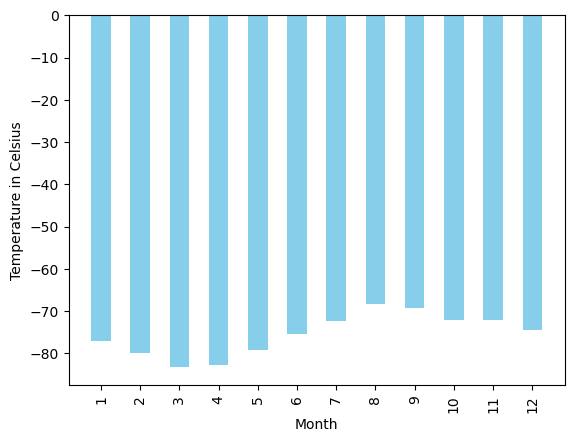

In [164]:
#Plot the average temperature by month
import numpy as np
plt.bar(df_month_temp['month'],df_month_temp['min_temp'], width=0.50, color='skyblue')
plt.xticks(np.arange(0,12) + 1, rotation=90)

plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")


In [165]:
# Identify the coldest and hottest months in Curiosity's location
# The coldest month 
min_avg_temp = df_month_temp['min_temp'].min()
month_min_temp=df_month_temp.loc[df_month_temp['min_temp']==min_avg_temp]
month_min_temp


,month,sol,ls,min_temp,pressure
2,3,1204.40625,75.010417,-83.307292,877.322917


In [166]:

# The hottest month
max_avg_temp = df_month_temp['min_temp'].max()
month_max_temp=df_month_temp.loc[df_month_temp['min_temp']==max_avg_temp]
month_max_temp


,month,sol,ls,min_temp,pressure
7,8,795.333333,224.347518,-68.382979,873.829787


In [167]:
# 4. Average pressure by Martian month
pressure_month=df.groupby('month')['pressure'].mean()
pressure_month


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

/var/folders/hq/417ksjz55t33yv_l6fw4xsfw0000gp/T/ipykernel_55501/434000755.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pressure_month=df_by_month.mean().loc[:,['pressure']]


Text(0, 0.5, 'Atmospheric Pressure')

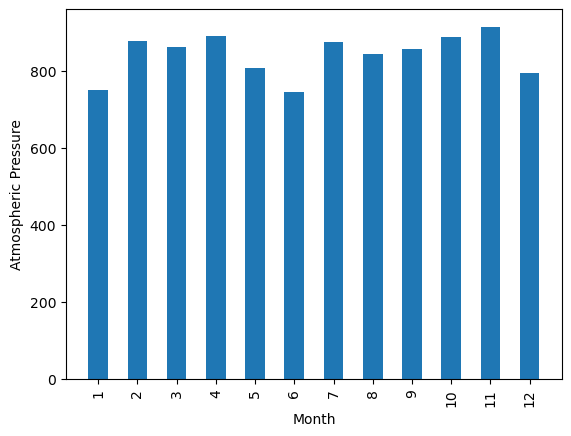

In [168]:
# Plot the average pressure by month
df_by_month=df.groupby('month')
df_pressure_month=df.groupby('month')['pressure'].mean()
df_pressure_month=df_by_month.mean().loc[:,['pressure']]


plt.bar(df_month_temp['month'],df_pressure_month['pressure'], width=0.50)
plt.xticks(np.arange(0,12) + 1, rotation=90)
# Create labels for the x and y axes.
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")

In [169]:
# The month with the lowest atmospheric pressure  
#headers_press = list(df)
df_pressure_month = df[headers[2:]].groupby('month', as_index=False).mean().sort_values('pressure')
#df_pressure_month

min_avg_pressure= df_pressure_month['pressure'].min()
month_min_pressure=df_pressure_month.loc[df_pressure_month['pressure']==min_avg_pressure]
month_min_pressure

,month,sol,ls,min_temp,pressure
5,6,750.829932,164.897959,-75.29932,745.054422


In [170]:
# The month with the highest atmospheric pressure  
max_avg_pressure= df_pressure_month['pressure'].max()
month_max_pressure=df_pressure_month.loc[df_pressure_month['pressure']==max_avg_pressure]
month_max_pressure

,month,sol,ls,min_temp,pressure
8,9,861.186567,254.052239,-69.171642,913.30597


In [171]:
# 5. How many terrestrial (earth) days are there in a Martian year?

martian_day_len=df['ls'].loc[0]
ls_len=df.loc[df['ls']==martian_day_len]


In [172]:
import datetime as dt
from datetime import timedelta
from datetime import datetime

t=ls_len['terrestrial_date'].loc[0]
martian_year_dt = ls_len['terrestrial_date'].iloc[1]
martian_year= martian_year_dt-t
martian_year

Timedelta('686 days 00:00:00')

In [173]:
def plot(x, y):
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_xlabel('Number of terrestrial days', fontsize=12)
    ax.set_ylabel('Minimum temperature)', fontsize=12)
    ax.set_xticks(np.arange(0, 2000, 250))
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.set_yticks(np.arange(-60, -91, -5))
    ax.plot(x, y)
    # Show Figure
    plt.show()

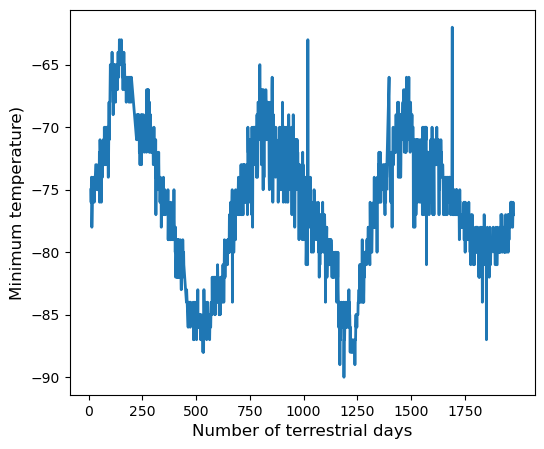

In [174]:
plot(df['sol'], df['min_temp'])

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [175]:
# Write the data to a CSV
df.to_csv('mars_table.csv',index=False)

In [176]:
browser.quit()